# Practical work 08 - Clustering

## Imports

In [95]:
import _pickle as pickle
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt

from sklearn.cluster import KMeans

## Exercise 4 - Optional : compare your implementation with the one of
scikit-learn

a) Load the two given datasets:

In [96]:
fichier1 = open("dataset_1.pkl", "rb")
data1, label1 = pickle.load(fichier1, encoding="latin1")
fichier1.close()

fichier2 = open("dataset_2.pkl", "rb")
data2, label2 = pickle.load(fichier2, encoding="latin1")
fichier2.close()

b) Visualize the data using various color for each unique labels

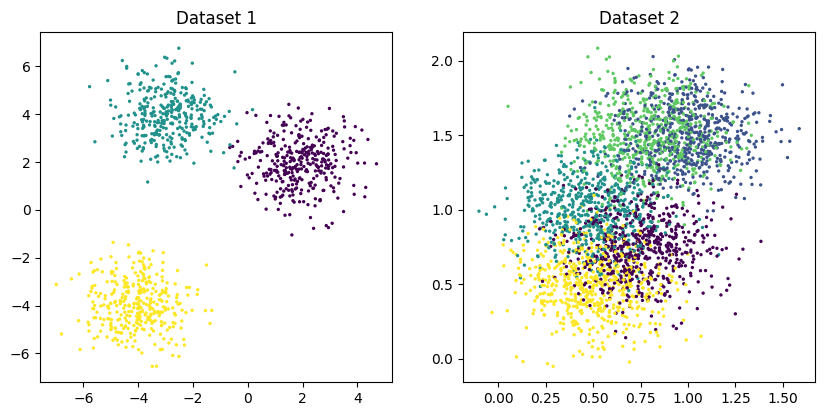

In [97]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.scatter(data1[:, 0], data1[:, 1], c=label1, s=2)
plt.title("Dataset 1")

plt.subplot(2, 2, 2)
plt.scatter(data2[:, 0], data2[:, 1], c=label2, s=2)
plt.title("Dataset 2")

plt.show()

Running default k-Means

In [98]:
kmeans_1 = KMeans(n_clusters=3).fit(data1)
kmeans_2 = KMeans(n_clusters=5).fit(data2)

Visualizing the results : 

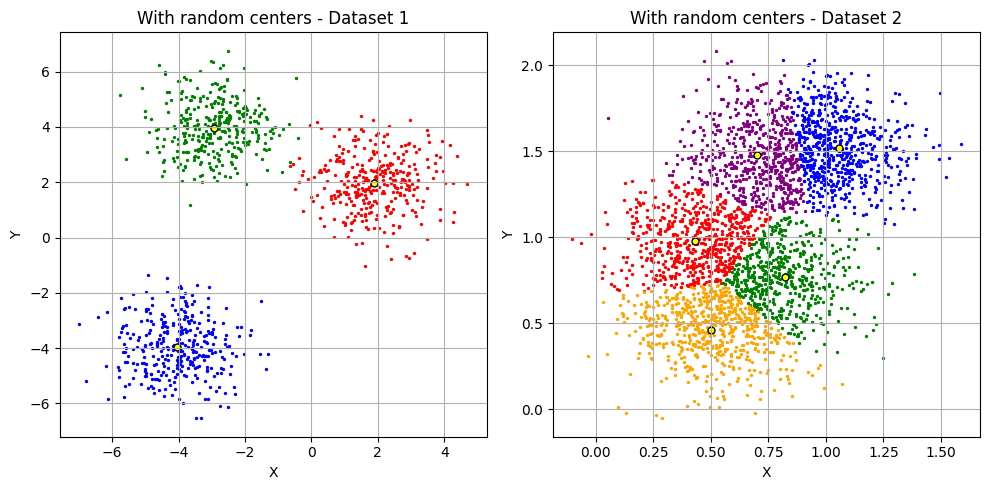

In [99]:
def plot_results(kmeans: KMeans, data: np.ndarray, title: str):
    couleurs = ['red', 'blue', 'green', 'orange', 'purple']

    labels = kmeans.predict(data)
    classes = np.unique(labels)

    for i, classe in enumerate(classes):
        indices = np.where(labels == classe)
        points = data[indices]
        plt.scatter(
            points[:, 0],
            points[:, 1],
            color=couleurs[i % len(couleurs)],
            s=2,
            label=f'Cluster {classe}'
        )

    centres = kmeans.cluster_centers_
    plt.scatter(
        centres[:, 0],
        centres[:, 1],
        color='yellow',
        marker='.',
        s=100,
        edgecolors='black',
        label='centroids'
    )

    plt.title(title)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.grid(True)



plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plot_results(kmeans_1, data1, "With random centers - Dataset 1")
plt.subplot(1, 2, 2)
plot_results(kmeans_2, data2, "With random centers - Dataset 2")
plt.tight_layout()
plt.show()

Running with randoms centers

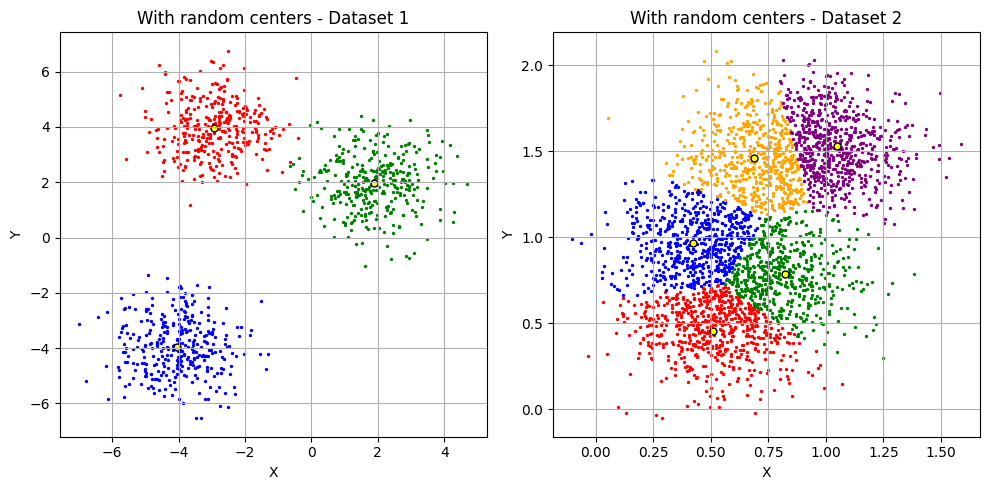

In [100]:
kmeans_1 = KMeans(n_clusters=3, init="random").fit(data1)
kmeans_2 = KMeans(n_clusters=5, init="random").fit(data2)


plt.figure(figsize=(10, 5))


plt.subplot(1, 2, 1)
plot_results(kmeans_1, data1, "With random centers - Dataset 1")
plt.subplot(1, 2, 2)
plot_results(kmeans_2, data2, "With random centers - Dataset 2")

plt.tight_layout()
plt.show()

# `n_init` = 1

...